## Final Project Submission

Please fill out:
* Student name: Doug Steen
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# OBTAIN

### Importing relevant libraries and data

In [1]:
# Import revlevant libraries and initiating desired settings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import math
import itertools
%matplotlib inline

plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

# Ignore pink warnings 
import warnings
warnings.filterwarnings('ignore')

# Allow for a large # of columns in pandas dataframes
pd.set_option('display.max_columns',0)

In [2]:
# Check contents of the working directory
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 7A4A-3281

 Directory of C:\Users\dougl\Learn.co_lessons\mod_1_proj\dsc-v2-mod1-final-project-online-ds-ft-100719

10/23/2019  03:43 PM    <DIR>          .
10/23/2019  03:43 PM    <DIR>          ..
10/22/2019  08:59 AM               146 .gitignore
10/22/2019  09:11 AM    <DIR>          .ipynb_checkpoints
10/22/2019  08:59 AM                93 .learn
10/22/2019  08:59 AM         1,425,341 awesome.gif
10/22/2019  08:59 AM             1,120 column_names.md
10/22/2019  08:59 AM             1,846 CONTRIBUTING.md
10/22/2019  08:59 AM         2,475,934 kc_house_data.csv
10/22/2019  08:59 AM             1,354 LICENSE.md
10/22/2019  08:59 AM            79,134 module1_project_rubric.pdf
10/22/2019  07:32 PM            12,421 OSEMIN_scaffolding.ipynb
10/22/2019  08:59 AM            13,290 README.md
10/23/2019  03:43 PM            32,387 student.ipynb
10/22/2019  07:24 PM           988,619 study_group_starter.ipynb
              12 File(s)

In [3]:
# Load data set, view head, display variable info
df = pd.read_csv('kc_house_data.csv')
display(df.head())
df.info()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Removing the 'id' and 'date' columns, as they will not be relevant to the regression

In [4]:
df.drop(['id', 'date'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

### ADDRESS NULL/MISSING VALUES AND POTENTIAL CATEGORICAL VARIABLES

### Get an overview of all columns using check_column function

In [5]:
# Check columns returns the datatype, null values and unique values of input series 
def check_column(series_feature, series_target=None):#,max_unique=10):
    """Takes a series from a dataframe (df[col]), 
    reports back info on unique values, nulls, .describe() stats.
    
    
    Args:
        series (series (DataFrame column)): column to report    
    """
    dashes = '---'*25
    series=series_feature
    
    
    print(dashes)
    
    print(f"series dtype is {series.dtype}\n")
    print(f'- Unique Values for {series.name}')
    display(series.value_counts())#[:max_unique])
    
    print('n- Null Values ')
    nulls = series.isna().sum()
    print(nulls)
    
    print('\n\tDescribe')
    print(series.describe())
    
    if series.dtype != 'object':
        sns.distplot(series)
        plt.show()
    else:
        print(f"{series.name} is a string column and cannot be plotted")

#     if series_target is not None:
        
        pass 

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for price


350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

n- Null Values 
0

	Describe
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


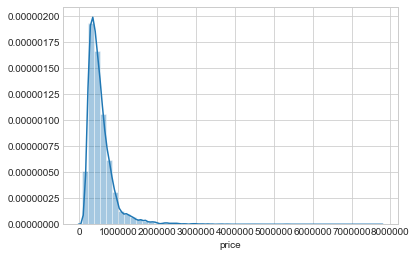

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for bedrooms


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


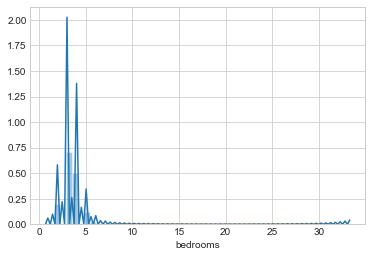

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for bathrooms


2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


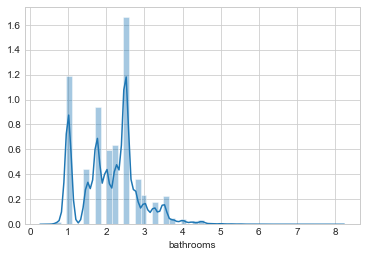

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_living


1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


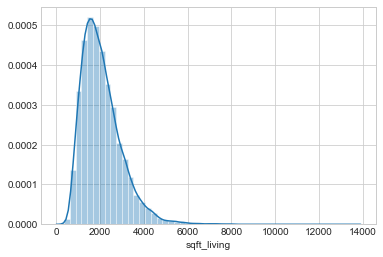

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_lot


5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

n- Null Values 
0

	Describe
count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


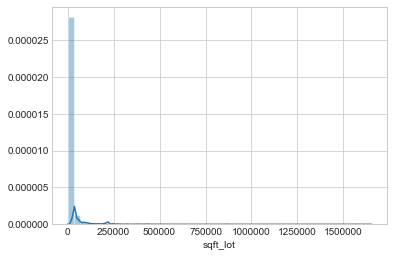

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for floors


1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64


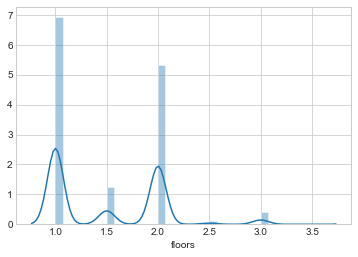

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for waterfront


0.0    19075
1.0      146
Name: waterfront, dtype: int64

n- Null Values 
2376

	Describe
count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64


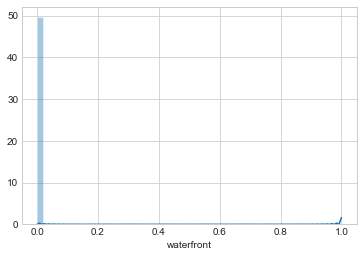

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for view


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

n- Null Values 
63

	Describe
count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64


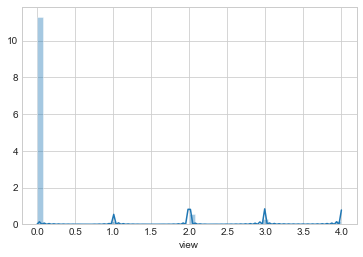

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for condition


3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64


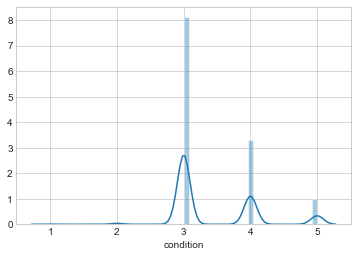

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for grade


7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64


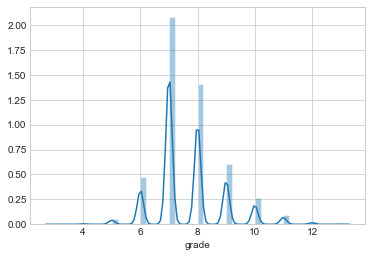

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_above


1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64


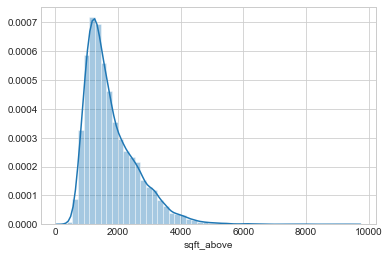

---------------------------------------------------------------------------
series dtype is object

- Unique Values for sqft_basement


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
207.0         1
1275.0        1
875.0         1
862.0         1
417.0         1
Name: sqft_basement, Length: 304, dtype: int64

n- Null Values 
0

	Describe
count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object
sqft_basement is a string column and cannot be plotted
---------------------------------------------------------------------------
series dtype is int64

- Unique Values for yr_built


2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64


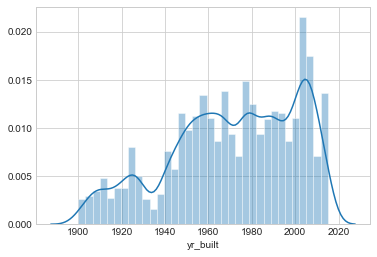

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for yr_renovated


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

n- Null Values 
3842

	Describe
count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64


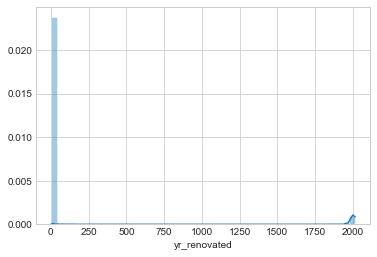

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for zipcode


98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64


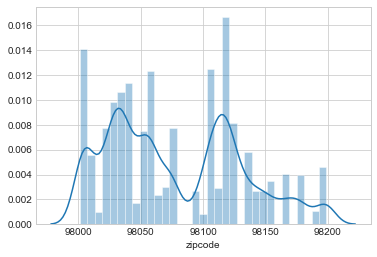

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for lat


47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
           ..
47.2785     1
47.4162     1
47.3870     1
47.2313     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64


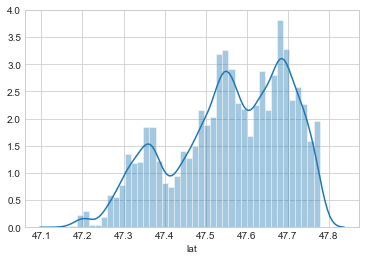

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for long


-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      -122.213982
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64


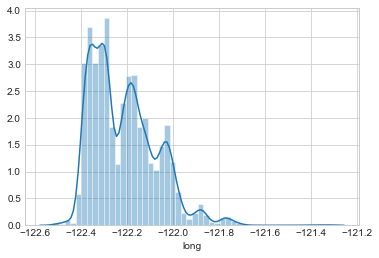

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_living15


1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64


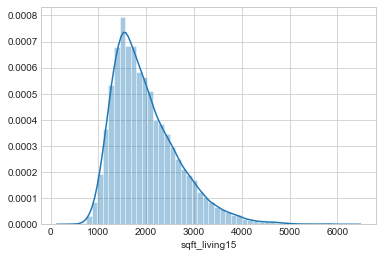

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_lot15


5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

n- Null Values 
0

	Describe
count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64


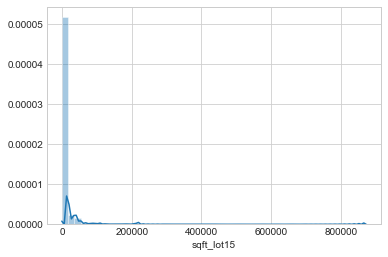

In [6]:
# Loop through the columns with check_columns
for col in df.columns:
    check_column(df[col])

### CONCLUSIONS ON NULL/MISSING VALUES:
#### - 'waterfront' - Lots of null values. STRATEGY: Replace null values with most common value, 0.0
#### -'view' - Some null values. STRATEGY: Replace null values with most common value, 0.0
#### -'yr_renovated' - Lots of null values, column entries mostly have value of 0.0. STRATEGY: Drop entire column from dataset
#### -'sqft_basement' - Placeholder variable '?'. STRATEGY: Replace '?' with most common value, 0.0

### Replace identified null values, remove 'yr_renovated' column, change 'sqft_basement' to categorical

In [7]:
# Replace nulls in 'waterfront' with 0.0
df.waterfront.fillna(value=0.0, inplace=True)

# Replace nulls in 'view' with 0.0
df.view.fillna(value=0.0, inplace=True)

# Drop 'yr_renovated' from dataframe
df.drop('yr_renovated', axis=1, inplace=True)

# Replace '?' values in 'sqft_basement' with 0.0
df.sqft_basement = df.sqft_basement.apply(lambda x: 0 if x=='0.0' else 0 if x =='?' else 1)

### CONCLUSIONS ON CATEGORICAL VARIABLES & DATA TYPES
#### - 'sqft_basement' - I want to re-cast as categorical. STRATEGY: Convert to a categorical variable (0 = no basement, 1 = has basement)
#### - 'waterfront', 'view', 'condition', should be categorical variables. STRATEGY: Convert these to categorical variables

In [8]:
# Make basement a categorical variable, create a new colunn with cat.codes
df.sqft_basement = df.sqft_basement.astype('category')
df['basement_coded'] = df.sqft_basement.cat.codes
df.basement_coded.value_counts()

0    13280
1     8317
Name: basement_coded, dtype: int64

In [9]:
# Make waterfront a categorical variable, create new column with cat.codes
df.waterfront = df.waterfront.astype('category')
df['wf_coded'] = df.waterfront.cat.codes
df.wf_coded.value_counts()

0    21451
1      146
Name: wf_coded, dtype: int64

In [10]:
# Make view a categorical variable, create new column with cat.codes
df.view = df.view.astype('category')
df['view_coded'] = df.view.cat.codes
df.view_coded.value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view_coded, dtype: int64

In [11]:
# Make condition a categorical variable, create new column with cat.codes
df.condition = df.condition.astype('category')
df['cond_coded'] = df.condition.cat.codes
df.cond_coded.value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: cond_coded, dtype: int64

### FEATURE ENGINEERING: DISTANCE FROM DOWNTOWN SEATTLE (dist_dt)
#### Using lat_lon_dist_calc function to calculate distance from observation to downtown Seattle
#### I am using this feature to replace the 'lat', 'long', and 'zipcode' columns as I believe it will capture information from all three
#### I hypothesize that there will be a decreasing relationship with price as dist_dt increases

In [12]:
# function to calculate distance (meters) from downtown Seattle using lat and lon
# default lat_0 and lon_0 are downtown Seattle

def lat_lon_dist_calc(lat_1, lon_1, lat_0=47.6050, lon_0=-122.3344):
    """Returns the distance (meters) between two lat/long coordinates.
    
    Args:
        lat_0 (value or series): latitude of reference point or first point (default is downtown Seattle)
        lon_0 (value or series): longitude of reference point or first point (default is downtown Seattle)
        lat_1 (value or series): latitude of comparison point or second point
        lon_1 (value or series): longitude of comparison point or second point
    """
    R = 6372800  # Earth's radius in meters

    phi1, phi2 = np.radians(lat_0), np.radians(lat_1) # Converting given latitudes to radians
    dphi = np.radians(lat_1 - lat_0) # Change in latitude conversion to radians
    dlambda = np.radians(lon_1 - lon_0) # Change in longitude conversion to radians

    # Haversine formula to calculate the great-circle distance between two points 
    a = np.sin(dphi/2)**2 + \
        np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R*c

In [13]:
dist_dt = lat_lon_dist_calc(lat_1=df.lat, lon_1=df.long, lat_0=47.6050, lon_0=-122.3344)
dist_dt.head()

0    11941.535518
1    12953.726115
2    16618.820484
3    10346.572376
4    21740.172916
dtype: float64

In [14]:
# Add dist_downtown column to df
df = pd.concat([df, dist_dt], axis=1)

In [15]:
df = df.rename(columns={0: 'dist_dt'})

In [16]:
# Drop lat, long, and zipcode columns from df
df = df.drop(['lat', 'long', 'zipcode'], axis=1)

### ASSESS MULTICOLLINEARITY OF FEATURES

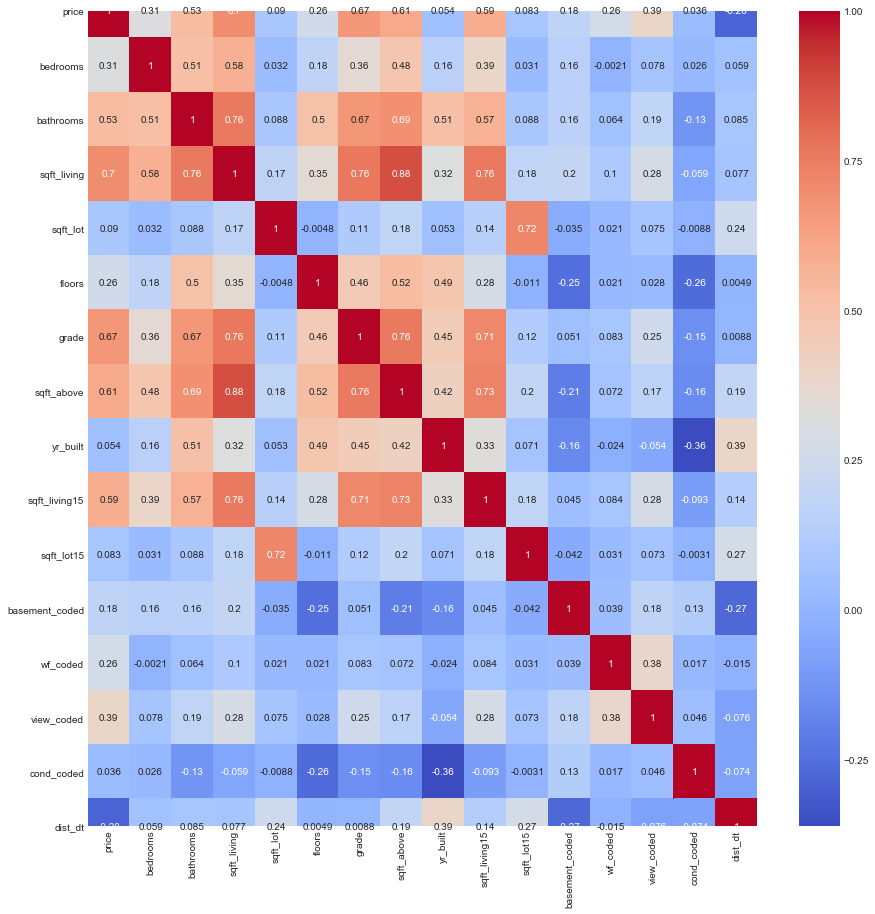

In [17]:
# Plotting correlation matrix to see relationships between independent variables, assess multicollinearity
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Multicollinearity observaions
#### - sqft_living is highly correlated (R > 0.75) to sqft_above, bathrooms, grade, sqft_living15
#### -Since it is highly correlated to many other variables, it makes sense to remove sqft_living before proceeding with regression

### Removal of collinear features for scrubbed df

In [18]:
# Dropping sqft_living from scrubbed dataframe due to collinearity (df_scrub)
# Removing sqft_basement, waterfront, view from df_scrub, since we have their cat.codes
df_scrub = df.drop(['sqft_living', 'sqft_basement', 'waterfront', 'view', 'condition'], axis=1)

In [19]:
df_scrub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
grade             21597 non-null int64
sqft_above        21597 non-null int64
yr_built          21597 non-null int64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
basement_coded    21597 non-null int8
wf_coded          21597 non-null int8
view_coded        21597 non-null int8
cond_coded        21597 non-null int8
dist_dt           21597 non-null float64
dtypes: float64(4), int64(7), int8(4)
memory usage: 1.9 MB


### SUMMARY OF INITIAL DATA SCRUB:
####  - Variables dropped from dataset: 
    - 'id', 'date' - These variabes will not add valuable information to a regression model
    - 'yr_renovated' - So many null and zero values that it will be easier to remove this column entirely
    - 'lat, long, zipcode' - These variables were removed in favor of the engineered feature 'dist_dt', which represents the distance of an observation from downtown Seattle
    - 'sqft_living' - Displayed collinearity with multiple other variables
#### - Variables left as continuous numerical:
    - 'price'
    - 'bedrooms'
    - 'bathrooms'
    - 'sqft_lot'
    - 'floors'
    - 'grade'
    - 'sqft_above'
    - 'yr_built'
    - 'sqft_living15'
    - 'sqft_lot15'
#### - Variables added through feature engineering as continuous numerical:
    - 'dist_dt' - Calculated distance from the observation to downtown Seattle
#### - Variables to be treated as categorical using cat.codes:
    - 'basement_coded' - Represents either '0' (no basement) or '1' (has a basement). Placeholders '?' replaced with 0.
    - 'wf_coded' - Represents either '0' (not waterfront) or '1' (is waterfront). Null values were replaced with 0.
    - 'view_coded' - Index from 0 to 4 on the quality of the view of property. Null values were replaced with 0.
    - 'cond_coded' - Index 0 to 4 on property condition

# EXPLORE

### VISUALIZING DISTRIBUTIONS AND SCATTER PLOTS
    -Check distribution shapes
    -Check linearity of data
    -View potential outliers

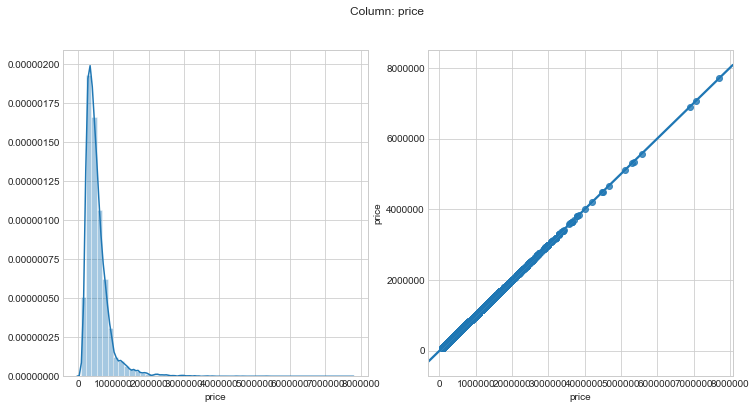

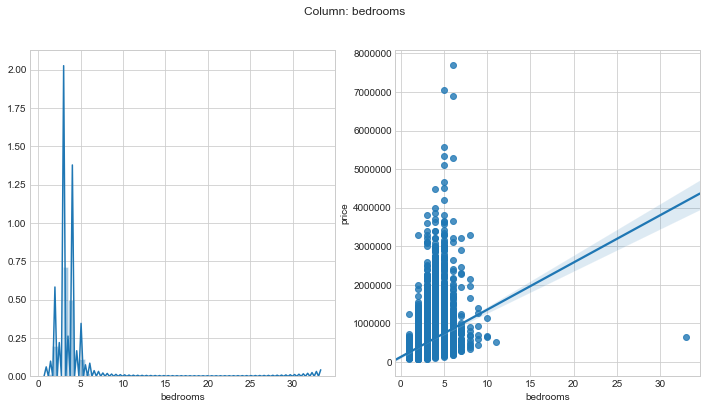

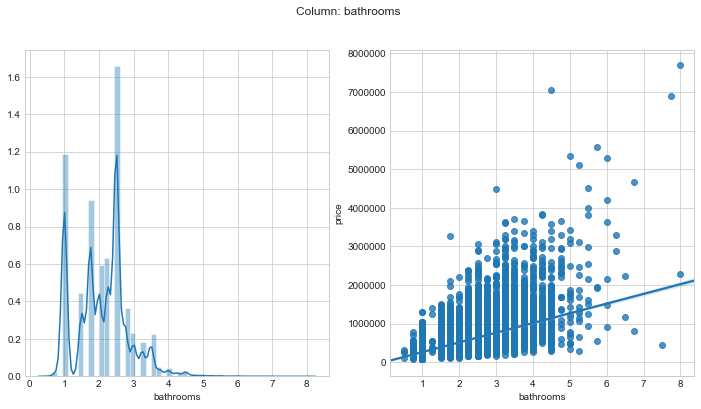

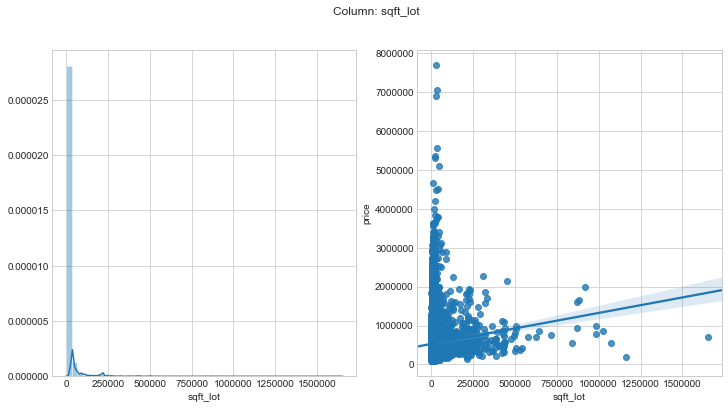

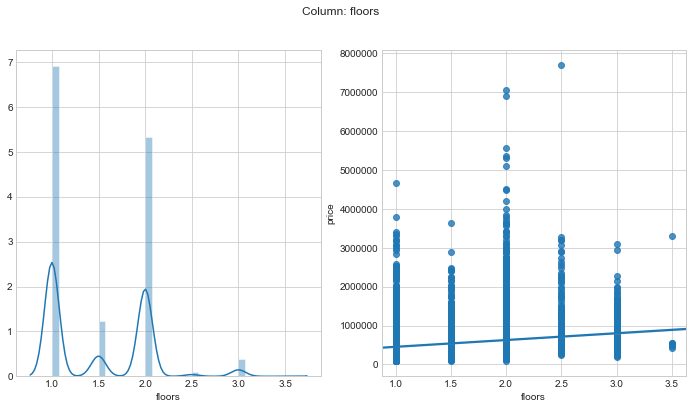

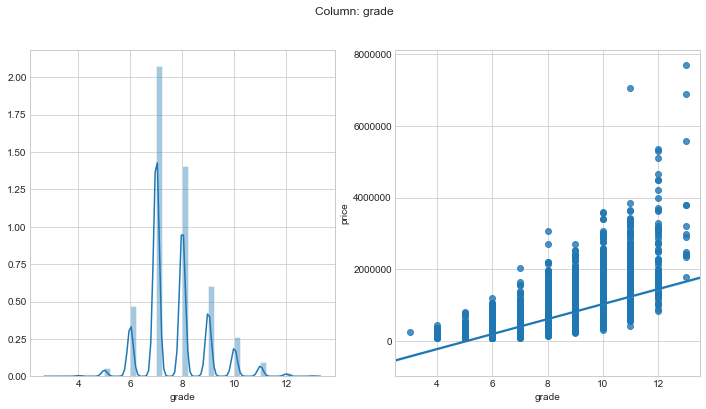

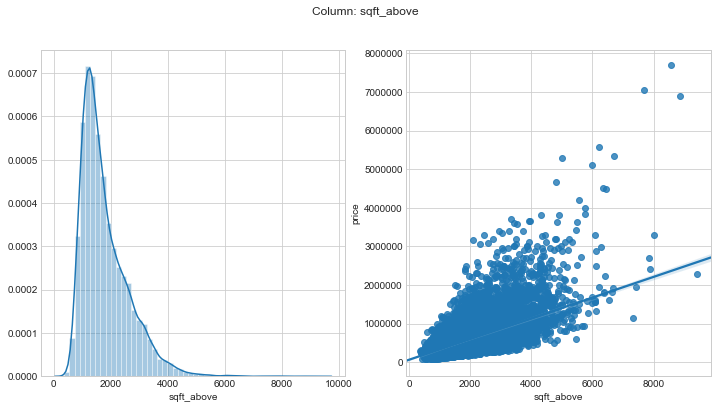

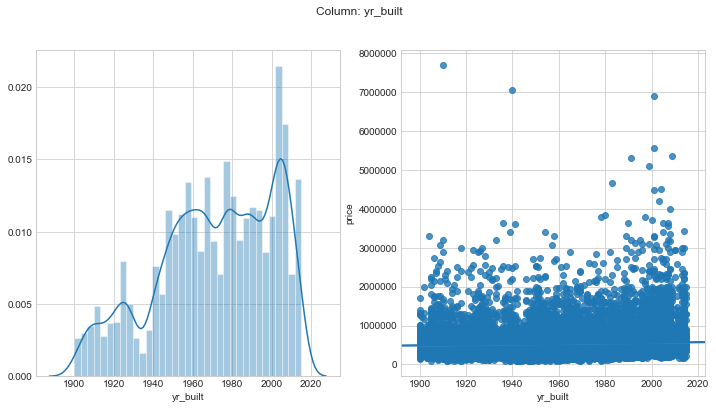

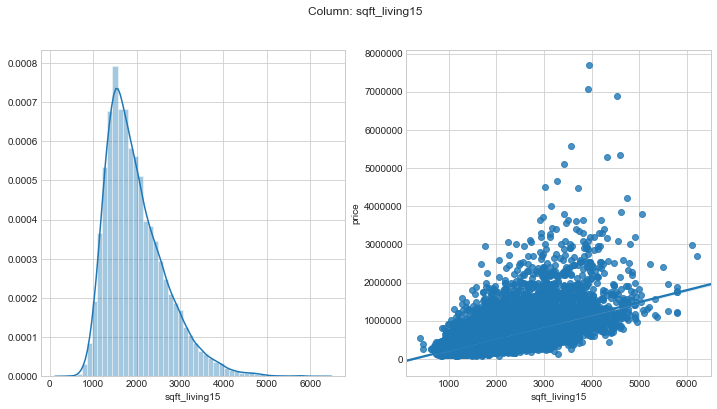

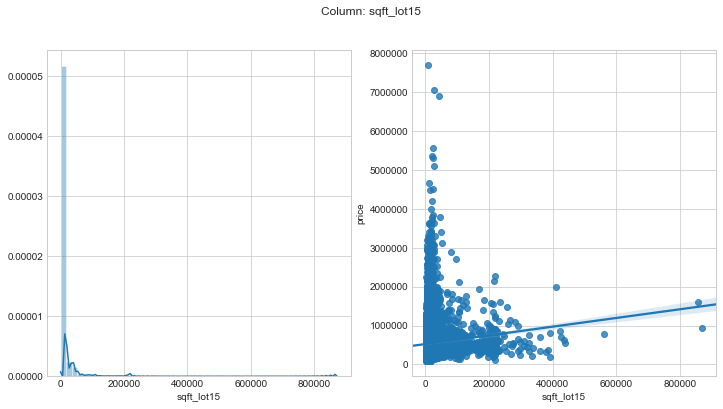

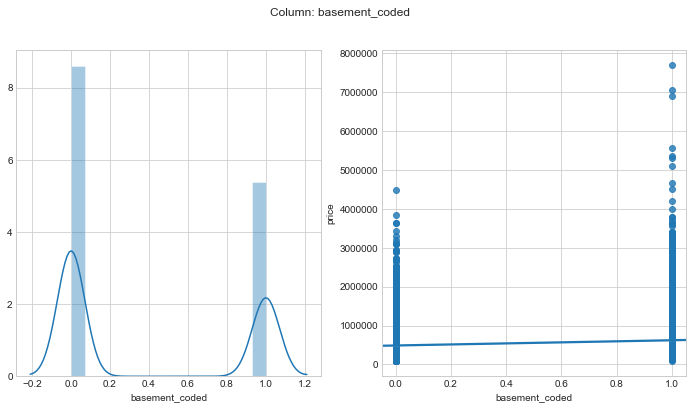

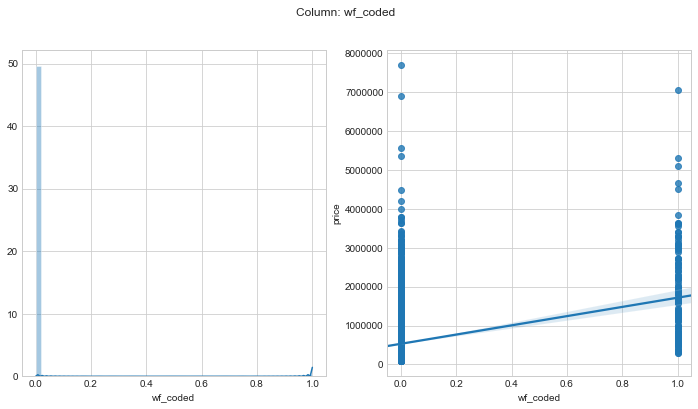

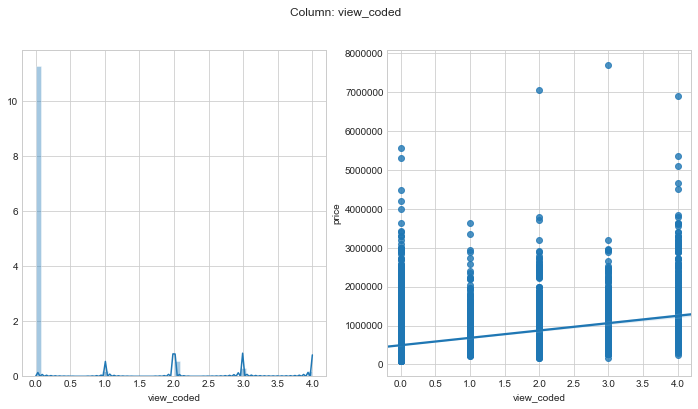

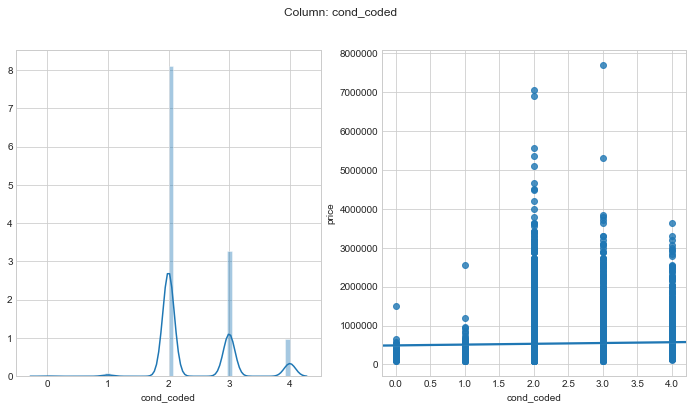

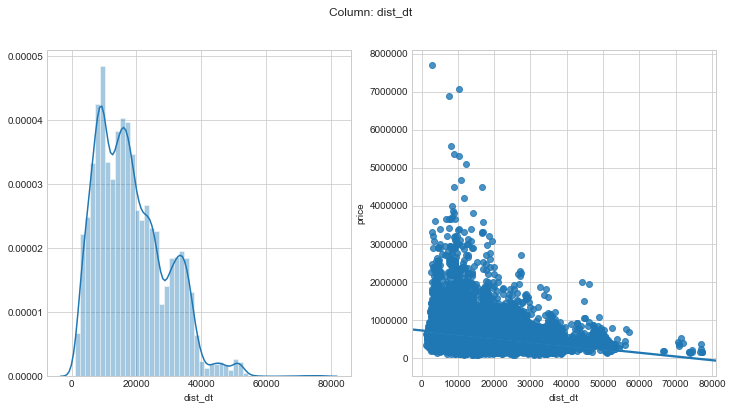

In [20]:
# Plot histogram and scatter/regline plots for each variable in df_scrub
for col in df_scrub.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    ax1 = sns.distplot(df_scrub[col])
    plt.subplot(122)
    ax2 = sns.regplot(df_scrub[col], df_scrub.price)
    plt.suptitle(f'Column: {col}')
    plt.show()

- Outliers seem to be present for several variables that may also be skewing distributions
- These outliers should be identified and removed, if appropriate, before continuing

### OUTLIER DETECTION AND REMOVAL
#### Outlier detection performed using IQR Scores

In [30]:
# Identify outliers for df_scrub non-categorical variables

non_cat_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
                'grade', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 'dist_dt']
out_index = []

for col in df_scrub[non_cat_cols]:
    q1, q3 = np.percentile(a=df_scrub[col], q=[25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
#     outliers = []
#     for i in df_scrub[col]:
#         if i < lower_bound or i > upper_bound:
#             outliers.append(i)       
    out_index.append(list(df_scrub[(df_scrub[col] < lower_bound) | (df_scrub[col] > upper_bound)].index))
    

    

outlier_index = set(list(itertools.chain.from_iterable(out_index)))

df_out_rem = df_scrub.drop(outlier_index)

display(df_scrub.info())
display(df_out_rem.info())
display(len(outlier_index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
grade             21597 non-null int64
sqft_above        21597 non-null int64
yr_built          21597 non-null int64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
basement_coded    21597 non-null int8
wf_coded          21597 non-null int8
view_coded        21597 non-null int8
cond_coded        21597 non-null int8
dist_dt           21597 non-null float64
dtypes: float64(4), int64(7), int8(4)
memory usage: 1.9 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16624 entries, 0 to 21596
Data columns (total 15 columns):
price             16624 non-null float64
bedrooms          16624 non-null int64
bathrooms         16624 non-null float64
sqft_lot          16624 non-null int64
floors            16624 non-null float64
grade             16624 non-null int64
sqft_above        16624 non-null int64
yr_built          16624 non-null int64
sqft_living15     16624 non-null int64
sqft_lot15        16624 non-null int64
basement_coded    16624 non-null int8
wf_coded          16624 non-null int8
view_coded        16624 non-null int8
cond_coded        16624 non-null int8
dist_dt           16624 non-null float64
dtypes: float64(4), int64(7), int8(4)
memory usage: 1.6 MB


None

4973

#### All outliers identified using IQR +/- 1.5 for non-categorical variables have now been removed, and stored in new df (df_out_rem).

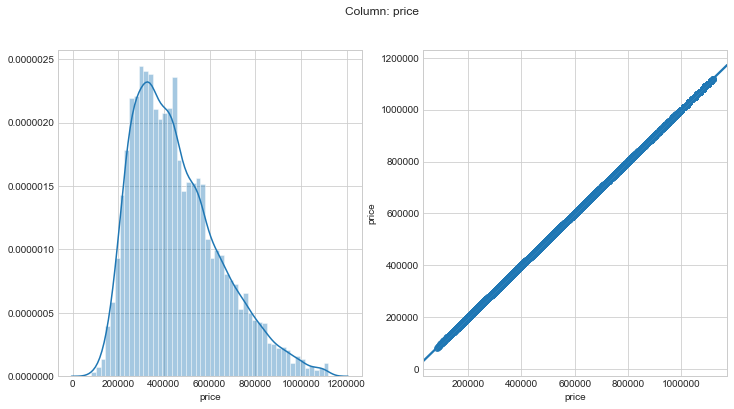

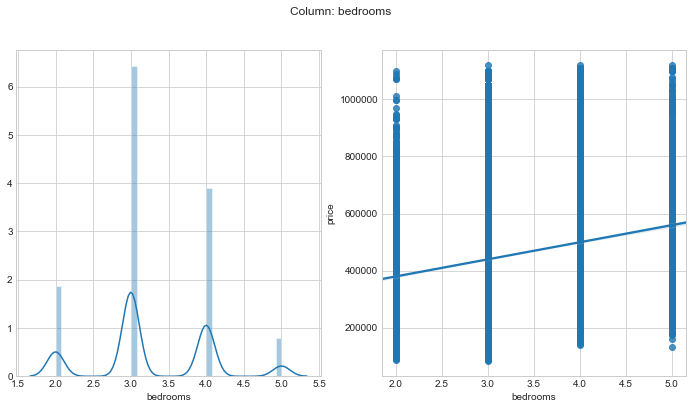

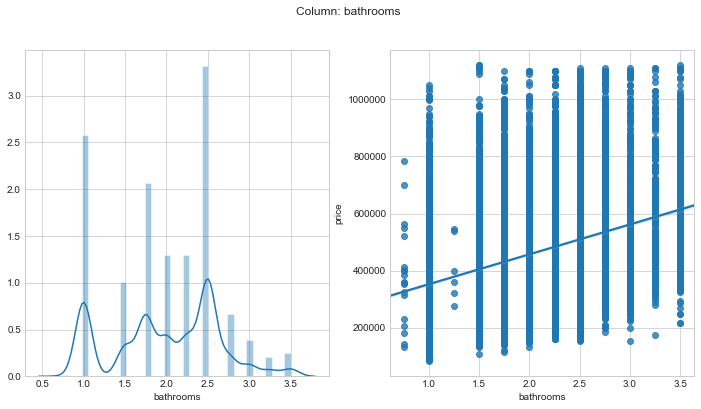

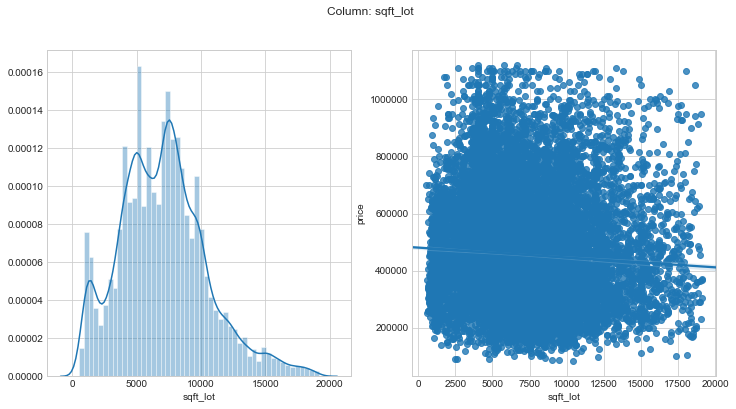

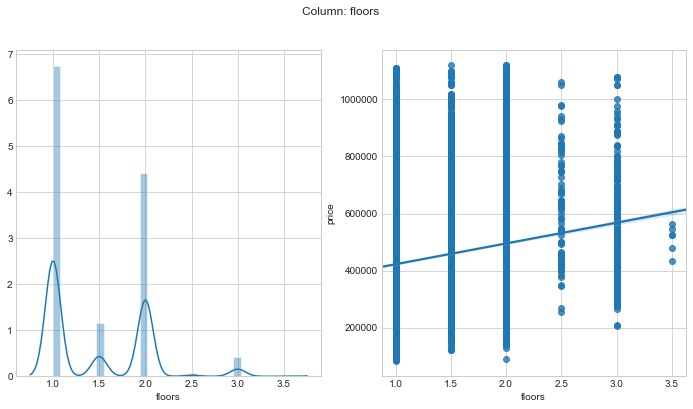

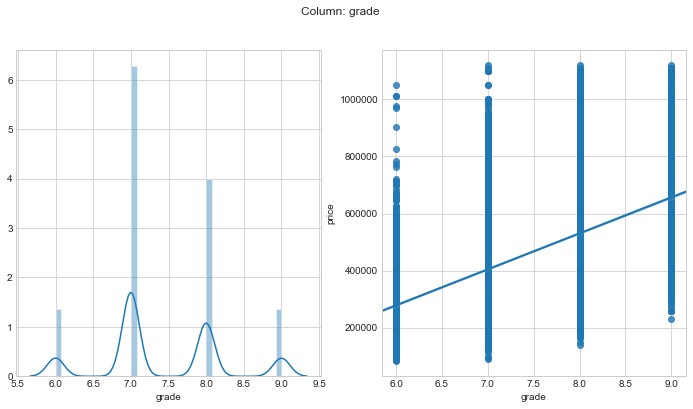

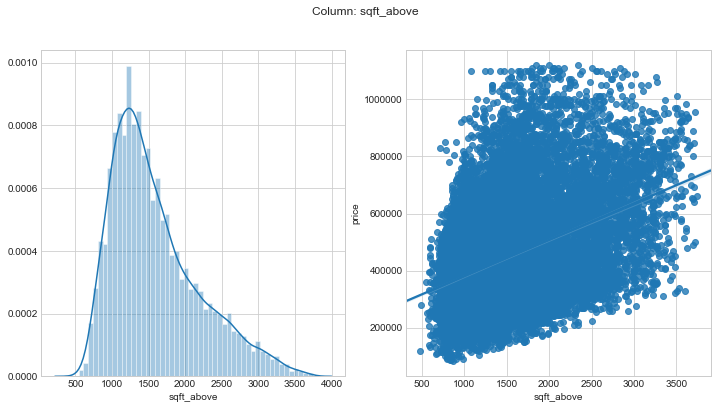

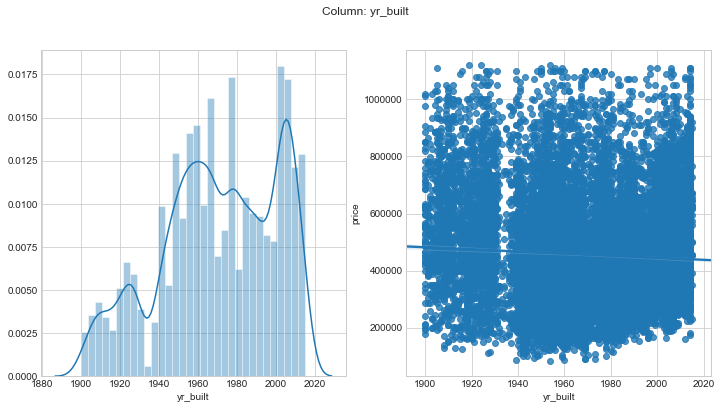

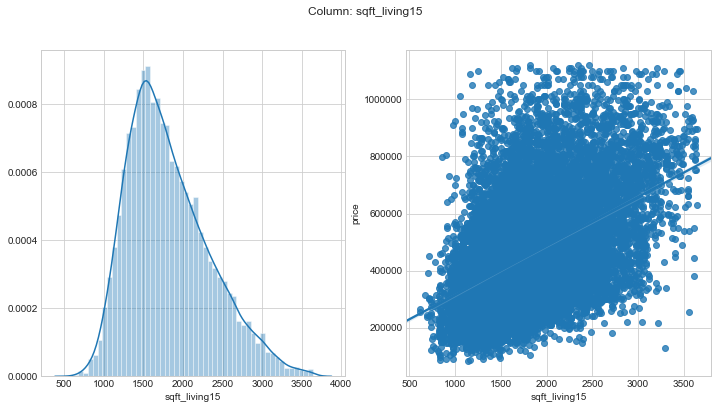

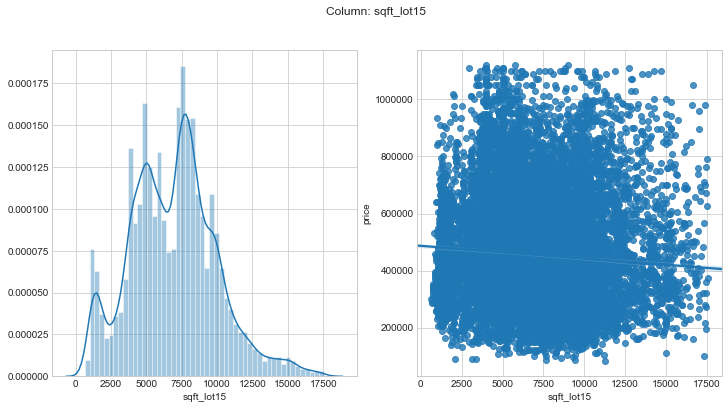

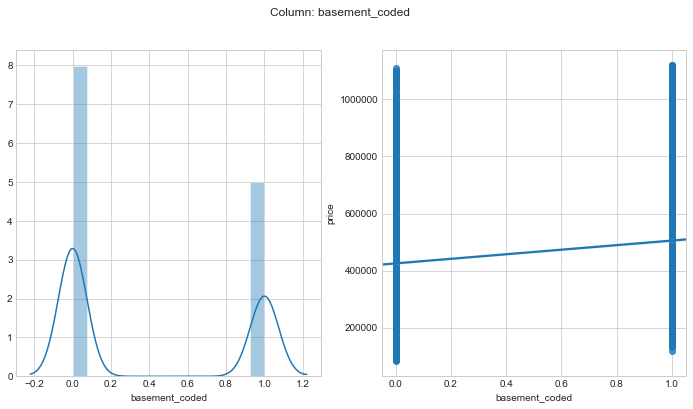

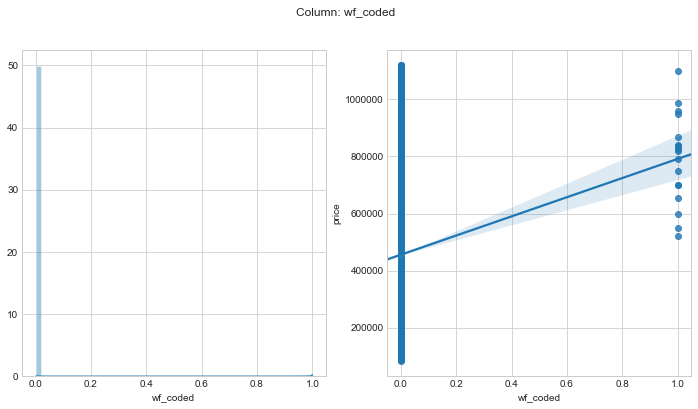

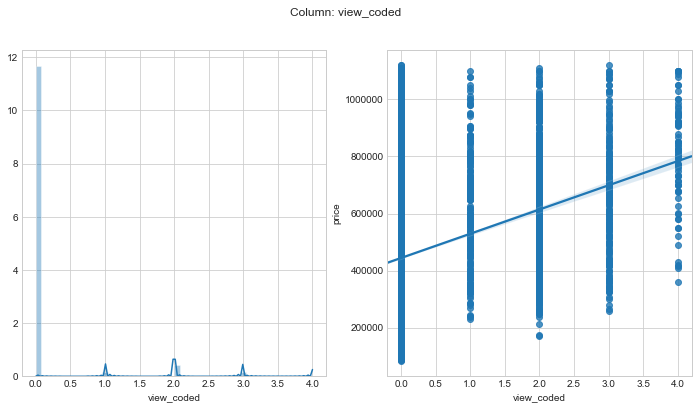

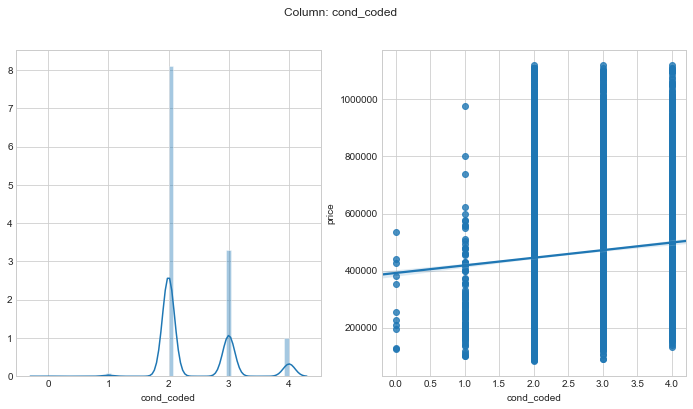

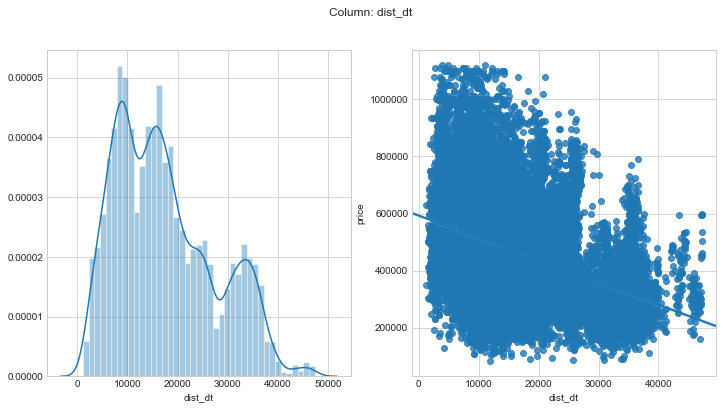

In [32]:
# Plot histogram and scatter/regline plots for each variable in df_out_rem
for col in df_out_rem.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    ax1 = sns.distplot(df_out_rem[col])
    plt.subplot(122)
    ax2 = sns.regplot(df_out_rem[col], df_out_rem.price)
    plt.suptitle(f'Column: {col}')
    plt.show()

### After outlier removal, would any features benefit from log transformation?
    'sqft_above' is a bit right skewed, will log transform that one
    -The others generally have some skew but look ok. I'm going to leave them alone for now.

### Log transformation of select variables

In [ ]:
# Trying log transformation for 'bathrooms', 'bedrooms', 'sqft_above', 'sqft_lot', 'sqft_lot15', 'sqft_living15'

In [ ]:
# Perform log transformation on these variables, and observe resulting histograms
df_log = pd.DataFrame([])
df_log['bathrooms_log'] = np.log(df.bathrooms)
df_log['bedrooms_log'] = np.log(df.bedrooms)
df_log['sqft_above_log'] = np.log(df.sqft_above)
df_log['sqft_lot_log'] = np.log(df.sqft_lot)
df_log['sqft_lot15_log'] = np.log(df.sqft_lot15)
df_log['sqft_living15_log'] = np.log(df.sqft_living15)


# Plot and check the log transformed distributions
df_log.hist(figsize=(10,10))

In [ ]:
# Update df columns with new log-transformed values
df.bathrooms = df_log.bathrooms_log
df.bedrooms = df_log.bedrooms_log
df.sqft_above = df_log.sqft_above_log
df.sqft_lot = df_log.sqft_lot_log
df.sqft_lot15 = df_log.sqft_lot15_log
df.sqft_living15 = df_log.sqft_living15_log
df.head()

### Min/max scaling of numerical variables

In [ ]:
# Perform min/max scaling on the numerical features
sc_bedrooms = (df.bedrooms - np.min(df.bedrooms))/(np.max(df.bedrooms) - np.min(df.bedrooms))
sc_bathrooms = (df.bathrooms - np.min(df.bathrooms))/(np.max(df.bathrooms) - np.min(df.bathrooms))
sc_sqft_lot = (df.sqft_lot - np.min(df.sqft_lot))/(np.max(df.sqft_lot) - np.min(df.sqft_lot))
sc_sqft_above = (df.sqft_above - np.min(df.sqft_above))/(np.max(df.sqft_above) - np.min(df.sqft_above))
sc_yr_built = (df.yr_built - np.min(df.yr_built))/(np.max(df.yr_built) - np.min(df.yr_built))
sc_sqft_living15 = (df.sqft_living15 - np.min(df.sqft_living15))/(np.max(df.sqft_living15) - np.min(df.sqft_living15))
sc_sqft_lot15 = (df.sqft_lot15 - np.min(df.sqft_lot15))/(np.max(df.sqft_lot15) - np.min(df.sqft_lot15))
sc_dist_downtown = (df.dist_downtown - np.min(df.dist_downtown))/(np.max(df.dist_downtown) - np.min(df.dist_downtown))

scaled_df = pd.DataFrame([])
scaled_df['bedrooms'] = sc_bedrooms
scaled_df['bathrooms'] = sc_bathrooms
scaled_df['sqft_lot'] = sc_sqft_lot
scaled_df['sqft_above'] = sc_sqft_above
scaled_df['yr_built'] = sc_yr_built
scaled_df['sqft_living15'] = sc_sqft_living15
scaled_df['sqft_lot15'] = sc_sqft_lot15
scaled_df['dist_downtown'] = sc_dist_downtown

scaled_df.head()

In [ ]:
# New df with scaled variables
df.drop(['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 
         'yr_built', 'sqft_living15', 'sqft_lot15', 'dist_downtown'], axis=1, inplace=True)
df = pd.concat([df, scaled_df], axis=1)

### Scatter plots to visualize each feature vs. target

In [ ]:
for col in df.columns:
    plt.scatter(df[col], df.price)
    plt.xlabel(f'{col}')
    plt.ylabel('price')
    plt.show()

# MODEL

### Recursive Feature Elimination (RFE)

In [ ]:
# Use recursive feature selection from sklearn to start building model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

X = df.drop('price', axis=1)
y = pd.DataFrame(data=df.price)

# Testing out the RFE to find the 5 most important features
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(X, y)

In [ ]:
selected_features = list(zip(selector.support_, X.columns))

In [ ]:
selected_features

In [ ]:
# Now I want to compare r^2 to mse as I increase # of features, to find point diminishing returns

In [ ]:
r_squared = []
for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(X, y)
    linreg.fit(X[X.columns[selector.support_]], y)
    r_sq = linreg.score(X[X.columns[selector.support_]], y)
    r_squared.append(r_sq)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = []
for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(X, y)
    linreg.fit(X[X.columns[selector.support_]], y)
    y_pred = linreg.predict(X[X.columns[selector.support_]])
    mse.append(mean_squared_error(y, y_pred))

In [ ]:
plt.figure(figsize=(12,6))
plt.title('R-squared and MSE vs # of Features')

ax1 = plt.subplot(121)
ax1.plot(range(1, len(X.columns)), r_squared)
ax1.set_ylabel('R-squared')
ax1.set_xlabel('# of Features')

ax2 = plt.subplot(122)
ax2.plot(range(1, len(X.columns)), mse)
ax2.set_ylabel('MSE')
ax2.set_xlabel('# of Features')

plt.show()

#### The above R-squared and MSE 'elbow' plots indicate that we can safely select 5 as the number of features.

In [ ]:
import statsmodels.api as sm
predictors = df[['wf_1', 'view_4', 'sqft_above', 'sqft_living15', 'dist_downtown']]
predictors_int = sm.add_constant(predictors)
model_5 = sm.OLS(df['price'],predictors_int).fit()
model_5.summary()

In [ ]:
model_5.intercept_

In [ ]:
# # Running simple linear regression for each predictor on its own
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# import statsmodels.stats.api as sms


# # log_price = np.log(df['price'])
# # df['log_price'] = log_price

# target_var = 'price'
# col_names = df_run.drop(['price'],axis=1).columns

# # Create results list for saving the output statstics for each predictor
# results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]] 

# for idx, val in enumerate(col_names): 
    
#     # Use the names of the columns to determine format of forumla  
#     if val.startswith('code'):
        
#         df_run[val] = df_run[val].astype('category').cat.as_ordered() 
#         f =f'{str(target_var)}~C({val})'
        
#     elif val.startswith('bin'):
        
#         df_run[val] = df_run[val].cat.as_ordered() 
#         f =f'{str(target_var)}~C({val})'
        
#     else:
        
#         f =f'{str(target_var)}~{val}'
        
#     # Run the ols models     
#     model = smf.ols(formula=f, data=df_run).fit() 
#     model.summary()
    
#     # Append results
#     results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ]) 
    
# # Turn results into dataframe with correct index and columns
# res_df = pd.DataFrame(results)
# res_df.columns = res_df.iloc[0]
# res_df=res_df[1:]
# res_df.set_index('ind_var',inplace=True)
# res_df.sort_values('r_squared',ascending=False)

# PROCESS CHECKLIST

1. **OBTAIN:**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [X] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [X]  Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
    - [X] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [X] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables

    
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [X] Check scales, ranges (df.describe())
    - [X] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [X] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [X] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [X] Check for linearity.
    - [X] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
   
4. **FIT AN INITIAL MODEL:** 
    - Various forms, detail later...
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
5. **Revise the fitted model**
    - Multicollinearity is big issue for lin regression and cannot fully remove it
    - Use the predictive ability of model to test it (like R2 and RMSE)
    - Check for missed non-linearity
6. **Holdout validation / Train/test split**
    - use sklearn train_test_split 
___